In [165]:
from pybaseball import statcast, statcast_pitcher, pitching_stats, cache
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pybaseball

import json
import os


pybaseball.cache.enable()
pd.set_option("display.max_columns", None)

## Data Creation and Preparation

In [166]:
columns = [
    'pitcher',
    'pitch_type',
    #'p_throws',
    'type',
    'balls',
    'strikes',
    'on_3b',
    'on_2b',
    'on_1b',
    'outs_when_up',
    'inning',
    'inning_topbot',
    'home_score',
    'away_score',
    'post_home_score',
    'post_away_score',
    #'home_team',
    #'away_team'
]

In [167]:
def download():
    path = './full-sample.csv'
    if not os.path.isfile(path): 
        data = statcast(start_dt='2015-01-01', end_dt='2022-12-31')
        data.to_csv('full-sample.csv', index=False)
    data = pd.read_csv(path, usecols=columns)
    data = data[data['pitch_type'].notna()]
    return data


def is_nan_to_bool(value):
    if pd.isna(value):
        return False
    return True

def swap_dictionary_key_values(dictonary):
    return {v: k for k, v in dictonary.items()}

def list_to_dictionary(list_to_convert):
    d = dict(enumerate(list_to_convert))
    d = swap_dictionary_key_values(d)
    return d
    
def get_or_create_dictionary(df, dictionary_key):
    dictionary = {}
    base_path = './dictionaries'
    if not os.path.exists(base_path):
        os.mkdir(base_path) 
        
    if not os.path.isfile(f'{base_path}/{dictionary_key}.json'): 
        dictionary = list_to_dictionary(data[dictionary_key].unique())
        with open(f'{base_path}/{dictionary_key}.json', 'w') as convert_file:
            convert_file.write(json.dumps(dictionary))
    else:
        with open(f'{base_path}/{dictionary_key}.json') as json_file:
            dictionary = json.load(json_file)
    print(dictionary)        
    return dictionary

def load_dictionaries():
    teams_dict = get_or_create_dictionary(data,'home_team')
    pitch_types_dict = get_or_create_dictionary(data, 'pitch_type')
    p_throws_dict = get_or_create_dictionary(data,'p_throws')
    result_types_dict = get_or_create_dictionary(data,'type')
    inning_topbot_dict = get_or_create_dictionary(data,'inning_topbot')
    return teams_dict, pitch_types_dict, p_throws_dict, result_types_dict, inning_topbot_dict


data = download()

data['on_3b'] = data['on_3b'].apply(is_nan_to_bool)
data['on_2b'] = data['on_2b'].apply(is_nan_to_bool)
data['on_1b'] = data['on_1b'].apply(is_nan_to_bool)
data = data.iloc[::-1]

teams_dict, pitch_types_dict, p_throws_dict, result_types_dict, inning_topbot_dict = load_dictionaries()

{'STL': 0, 'TB': 1, 'ARI': 2, 'NYM': 3, 'TEX': 4, 'MIL': 5, 'MIN': 6, 'OAK': 7, 'WSH': 8, 'CIN': 9, 'BOS': 10, 'LAD': 11, 'HOU': 12, 'BAL': 13, 'CWS': 14, 'PIT': 15, 'DET': 16, 'COL': 17, 'SD': 18, 'LAA': 19, 'PHI': 20, 'SF': 21, 'SEA': 22, 'CHC': 23, 'KC': 24, 'NYY': 25, 'MIA': 26, 'CLE': 27, 'TOR': 28, 'ATL': 29}
{'FF': 0, 'SI': 1, 'SL': 2, 'CH': 3, 'FC': 4, 'CU': 5, 'FS': 6, 'KC': 7, 'FO': 8, 'PO': 9, 'EP': 10, 'KN': 11, 'SC': 12, 'FA': 13, 'CS': 14, 'FT': 15}
{'R': 0, 'L': 1}
{'B': 0, 'S': 1, 'X': 2}
{'Top': 0, 'Bot': 1}


In [168]:
def missing_columns(df, threshold = 70, n = None):
    dff = df.isnull().sum()/df.shape[0] * 100
    dff = dff.reset_index()
    dff.columns = ['col', 'missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > threshold].shape[0]} columns with missing percent values greater than {threshold}%')
    if n:
        return dff.head(n)
    else:
        return dff

def unique_value_column(df):
    for col in df.columns:
        shape = df[col].value_counts().shape[0]
        missing = round(df[col].isnull().sum()/df.shape[0] * 100, 2)
        print(f'No of unique values in {col} is {shape} | missing percent is {missing}%')

In [169]:
missing_columns(data)

There are 0 columns in this dataset with missing values.
There are 0 columns with missing percent values greater than 70%


,col,missing_percent
0,pitch_type,0.0
1,pitcher,0.0
2,p_throws,0.0
3,type,0.0
4,balls,0.0
5,strikes,0.0
6,on_3b,0.0
7,on_2b,0.0
8,on_1b,0.0
9,outs_when_up,0.0


In [170]:
unique_value_column(data)

No of unique values in pitch_type is 16 | missing percent is 0.0%
No of unique values in pitcher is 1971 | missing percent is 0.0%
No of unique values in p_throws is 2 | missing percent is 0.0%
No of unique values in type is 3 | missing percent is 0.0%
No of unique values in balls is 5 | missing percent is 0.0%
No of unique values in strikes is 4 | missing percent is 0.0%
No of unique values in on_3b is 2 | missing percent is 0.0%
No of unique values in on_2b is 2 | missing percent is 0.0%
No of unique values in on_1b is 2 | missing percent is 0.0%
No of unique values in outs_when_up is 3 | missing percent is 0.0%
No of unique values in inning is 19 | missing percent is 0.0%
No of unique values in inning_topbot is 2 | missing percent is 0.0%
No of unique values in home_score is 27 | missing percent is 0.0%
No of unique values in away_score is 28 | missing percent is 0.0%
No of unique values in post_away_score is 28 | missing percent is 0.0%
No of unique values in post_home_score is 27 

In [171]:
data.head(60)
data.to_csv('essential-columns.csv', index=False)

In [173]:
data = pd.read_csv('essential-columns.csv')
#data['home_team'] = data['home_team'].apply(lambda x: teams_dict[x])
#data['away_team'] = data['away_team'].apply(lambda x: teams_dict[x])
data['pitch_type'] = data['pitch_type'].apply(lambda x: pitch_types_dict[x])
#data['p_throws'] = data['p_throws'].apply(lambda x: p_throws_dict[x])
data['type'] = data['type'].apply(lambda x: result_types_dict[x])
data['inning_topbot'] = data['inning_topbot'].apply(lambda x: inning_topbot_dict[x])

In [174]:
data.head(25)

,pitch_type,pitcher,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,home_score,away_score,post_away_score,post_home_score
0,0,593372,0,0,0,0,False,False,False,0,1,0,0,0,0,0
1,1,593372,0,1,1,0,False,False,False,0,1,0,0,0,0,0
2,1,593372,0,0,1,1,False,False,False,0,1,0,0,0,0,0
3,2,593372,0,2,2,1,False,False,False,0,1,0,0,0,0,0
4,1,593372,0,1,0,0,False,False,True,0,1,0,0,0,0,0
5,1,593372,0,0,0,1,False,False,True,0,1,0,0,0,0,0
6,2,593372,0,0,1,1,False,False,True,0,1,0,0,0,0,0
7,2,593372,0,1,2,1,False,False,True,0,1,0,0,0,0,0
8,0,593372,0,1,2,2,False,False,True,0,1,0,0,0,0,0
9,0,593372,0,0,0,0,False,False,True,1,1,0,0,0,0,0


In [175]:
pitchers = data['pitcher'].unique()
base_path = './pitchers'
if not os.path.exists(base_path):
    os.mkdir(base_path)

for pitcher in pitchers:
    path = f'{base_path}/{pitcher}.csv'
    df = data[data['pitcher'] == pitcher]
    df = df.drop(['pitcher'], axis='columns')
    df['on_3b'] = df['on_3b'].apply(is_nan_to_bool)
    df['on_2b'] = df['on_2b'].apply(is_nan_to_bool)
    df['on_1b'] = df['on_1b'].apply(is_nan_to_bool)
    df.to_csv(path, index=False)
    

## Model Testing

In [176]:
import tensorflow as tf
import os
import pandas as pd
import sklearn
import numpy as np
from tsai.models.MINIROCKET_Pytorch import *
from tsai.models.utils import *
from tsai.all import *
computer_setup()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

os              : Windows-10-10.0.22621-SP0
python          : 3.10.2
tsai            : 0.3.3
fastai          : 2.7.10
fastcore        : 1.5.27
torch           : 1.13.0+cu116
device          : 1 gpu (['NVIDIA GeForce GTX 1660 Ti'])
cpu cores       : 8
threads per cpu : 2
RAM             : 31.36 GB
GPU memory      : [6.0] GB


device(type='cuda', index=0)

In [196]:
def df_to_X_y2(df: pd.DataFrame, target_column, window_size = 5):
    df_2 = df.drop(target_column, axis='columns')
    df_as_np = df_2.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        X.append(row)
        label = df.iloc[i + window_size][target_column]
        y.append(label)
    return np.array(X), np.array(y)



In [214]:
data = pd.read_csv('essential-columns.csv')
teams_dict, pitch_types_dict, p_throws_dict, result_types_dict, inning_topbot_dict = load_dictionaries()

{'STL': 0, 'TB': 1, 'ARI': 2, 'NYM': 3, 'TEX': 4, 'MIL': 5, 'MIN': 6, 'OAK': 7, 'WSH': 8, 'CIN': 9, 'BOS': 10, 'LAD': 11, 'HOU': 12, 'BAL': 13, 'CWS': 14, 'PIT': 15, 'DET': 16, 'COL': 17, 'SD': 18, 'LAA': 19, 'PHI': 20, 'SF': 21, 'SEA': 22, 'CHC': 23, 'KC': 24, 'NYY': 25, 'MIA': 26, 'CLE': 27, 'TOR': 28, 'ATL': 29}
{'FF': 0, 'SI': 1, 'SL': 2, 'CH': 3, 'FC': 4, 'CU': 5, 'FS': 6, 'KC': 7, 'FO': 8, 'PO': 9, 'EP': 10, 'KN': 11, 'SC': 12, 'FA': 13, 'CS': 14, 'FT': 15}
{'R': 0, 'L': 1}
{'B': 0, 'S': 1, 'X': 2}
{'Top': 0, 'Bot': 1}


In [215]:
test_df = pd.read_csv('./pitchers/645261.csv')
test_df.on_3b = test_df.on_3b.replace({True: 1, False: 0})
test_df.on_2b = test_df.on_2b.replace({True: 1, False: 0})
test_df.on_1b = test_df.on_1b.replace({True: 1, False: 0})
X, y = df_to_X_y2(test_df, 'pitch_type', 10)


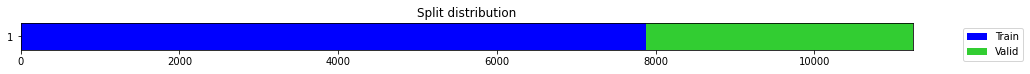

((#7874) [0,1,2,3,4,5,6,7,8,9...],
 (#3374) [7874,7875,7876,7877,7878,7879,7880,7881,7882,7883...])

In [216]:
splits = get_splits(y, valid_size=.3, stratify=True, random_state=23, shuffle=False)
splits

In [217]:
#X = torch.from_numpy(X).float().to(device)
#y = torch.from_numpy(y).float().to(device)

In [218]:
X_train = X[splits[0]]
type(X_train[0][0][0])

numpy.int64

In [224]:
mrf = MiniRocketFeatures(X.shape[1], X.shape[2]).to(device)
X_train = X[splits[0]]
X_train = torch.from_numpy(X_train).float().to(device)
mrf.fit(X_train)
X_feat = get_minirocket_features(torch.from_numpy(X).float().to(device), mrf, chunksize=20, to_np=True)
X_feat.shape, type(X_feat)

((11248, 9996, 1), numpy.ndarray)

In [225]:
PATH = Path("./models/MRF.pt")
PATH.parent.mkdir(parents=True, exist_ok=True)
torch.save(mrf.state_dict(), PATH)

In [226]:
# Using tsai/fastai, create DataLoaders for the features in X_feat.
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X_feat, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
                 
# model is a linear classifier Head
model = build_ts_model(MiniRocketHead, dls=dls)
model.head

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): BatchNorm1d(9996, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Linear(in_features=9996, out_features=5, bias=True)
)

SuggestedLRs(valley=1.4454397387453355e-05)

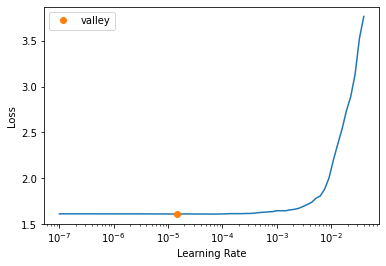

In [227]:
# Using tsai/fastai, create DataLoaders for the features in X_feat.
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X_feat, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
                 
# model is a linear classifier Head
model = build_ts_model(MiniRocketHead, dls=dls)
                 
# Drop into fastai and use it to find a good learning rate.
learn = Learner(dls, model, metrics=accuracy, cbs=ShowGraph())
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.601824,1.624218,0.262596,00:01
1,1.604200,1.704898,0.234736,00:01
2,1.545004,1.719615,0.244813,00:01
3,1.491068,1.705184,0.239478,00:01
4,1.441931,1.649433,0.241553,00:01
5,1.377085,1.635890,0.247777,00:01
6,1.335374,1.674147,0.251630,00:01
7,1.287491,1.633561,0.250445,00:01
8,1.252049,1.628001,0.244517,00:01
9,1.228421,1.626982,0.248370,00:01


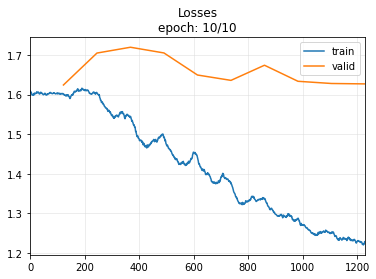

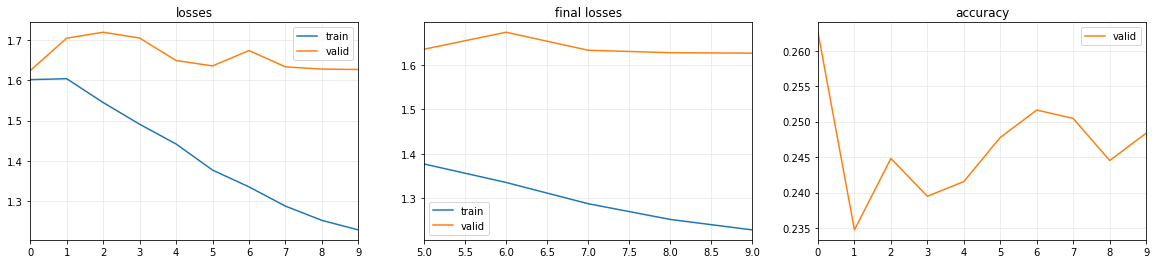

Total time              : 13.450377


13.450377

In [228]:
# As above, use tsai to bring X_feat into fastai, and train.
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X_feat, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
model = build_ts_model(MiniRocketHead, dls=dls)
learn = Learner(dls, model, metrics=accuracy, cbs=ShowGraph())
timer.start()
learn.fit_one_cycle(10, 3e-4)
timer.stop()

In [229]:
PATH = Path('./models/MRL.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

### Inference

In [230]:
mrf = MiniRocketFeatures(X.shape[1], X.shape[2]).to(device)
PATH = Path("./models/MRF.pt")
mrf.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [236]:
new_feat = get_minirocket_features(torch.from_numpy(X[splits[1]]).float().to(device), mrf, chunksize=20, to_np=True)
new_feat.shape, type(new_feat)

((3374, 9996, 1), numpy.ndarray)

In [237]:
PATH = Path('./models/MRL.pkl')
learn = load_learner(PATH, cpu=False)

In [248]:
probas, _, preds = learn.get_X_preds(new_feat)
preds

array(['0', '0', '2', ..., '1', '1', '1'], dtype='<U1')

In [249]:
sklearn.metrics.accuracy_score(y[splits[1]], preds)

0.0